# OpenSources

**IMPORTANT NOTE:** In this case, there are no meaningful attributes to be analysed - this dataset is only a list of websites with their label (type).

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df = pd.read_csv('data/data.csv')

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(833, 6)

Overview of the data:

In [6]:
df.head()

,Unnamed: 0,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
0,100percentfedup.com,bias,NaN,NaN,NaN,NaN
1,365usanews.com,bias,conspiracy,NaN,NaN,NaN
2,4threvolutionarywar.wordpress.com,bias,conspiracy,NaN,NaN,NaN
3,aheadoftheherd.com,bias,NaN,NaN,"false quotes regarding banking, heavily promot...",NaN
4,americablog.com,bias,clickbait,NaN,domain for sale,NaN


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

Unnamed: 0                        object
type                              object
2nd type                          object
3rd type                          object
Source Notes (things to know?)    object
Unnamed: 5                        object
dtype: object

### Basic characteristics

In [8]:
df.describe()

,Unnamed: 0,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
count,833,833,369,98,264,3
unique,825,16,18,13,132,2
top,madworldnews.com,fake,bias,bias,http://www.politifact.com/punditfact/article/2...,
freq,3,235,79,20,111,2


In [9]:
df.describe(exclude=[np.number])

,Unnamed: 0,type,2nd type,3rd type,Source Notes (things to know?),Unnamed: 5
count,833,833,369,98,264,3
unique,825,16,18,13,132,2
top,madworldnews.com,fake,bias,bias,http://www.politifact.com/punditfact/article/2...,
freq,3,235,79,20,111,2


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

2nd type: 464 (55.7%)
3rd type: 735 (88.24%)
Source Notes (things to know?): 569 (68.31%)
Unnamed: 5: 830 (99.64%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


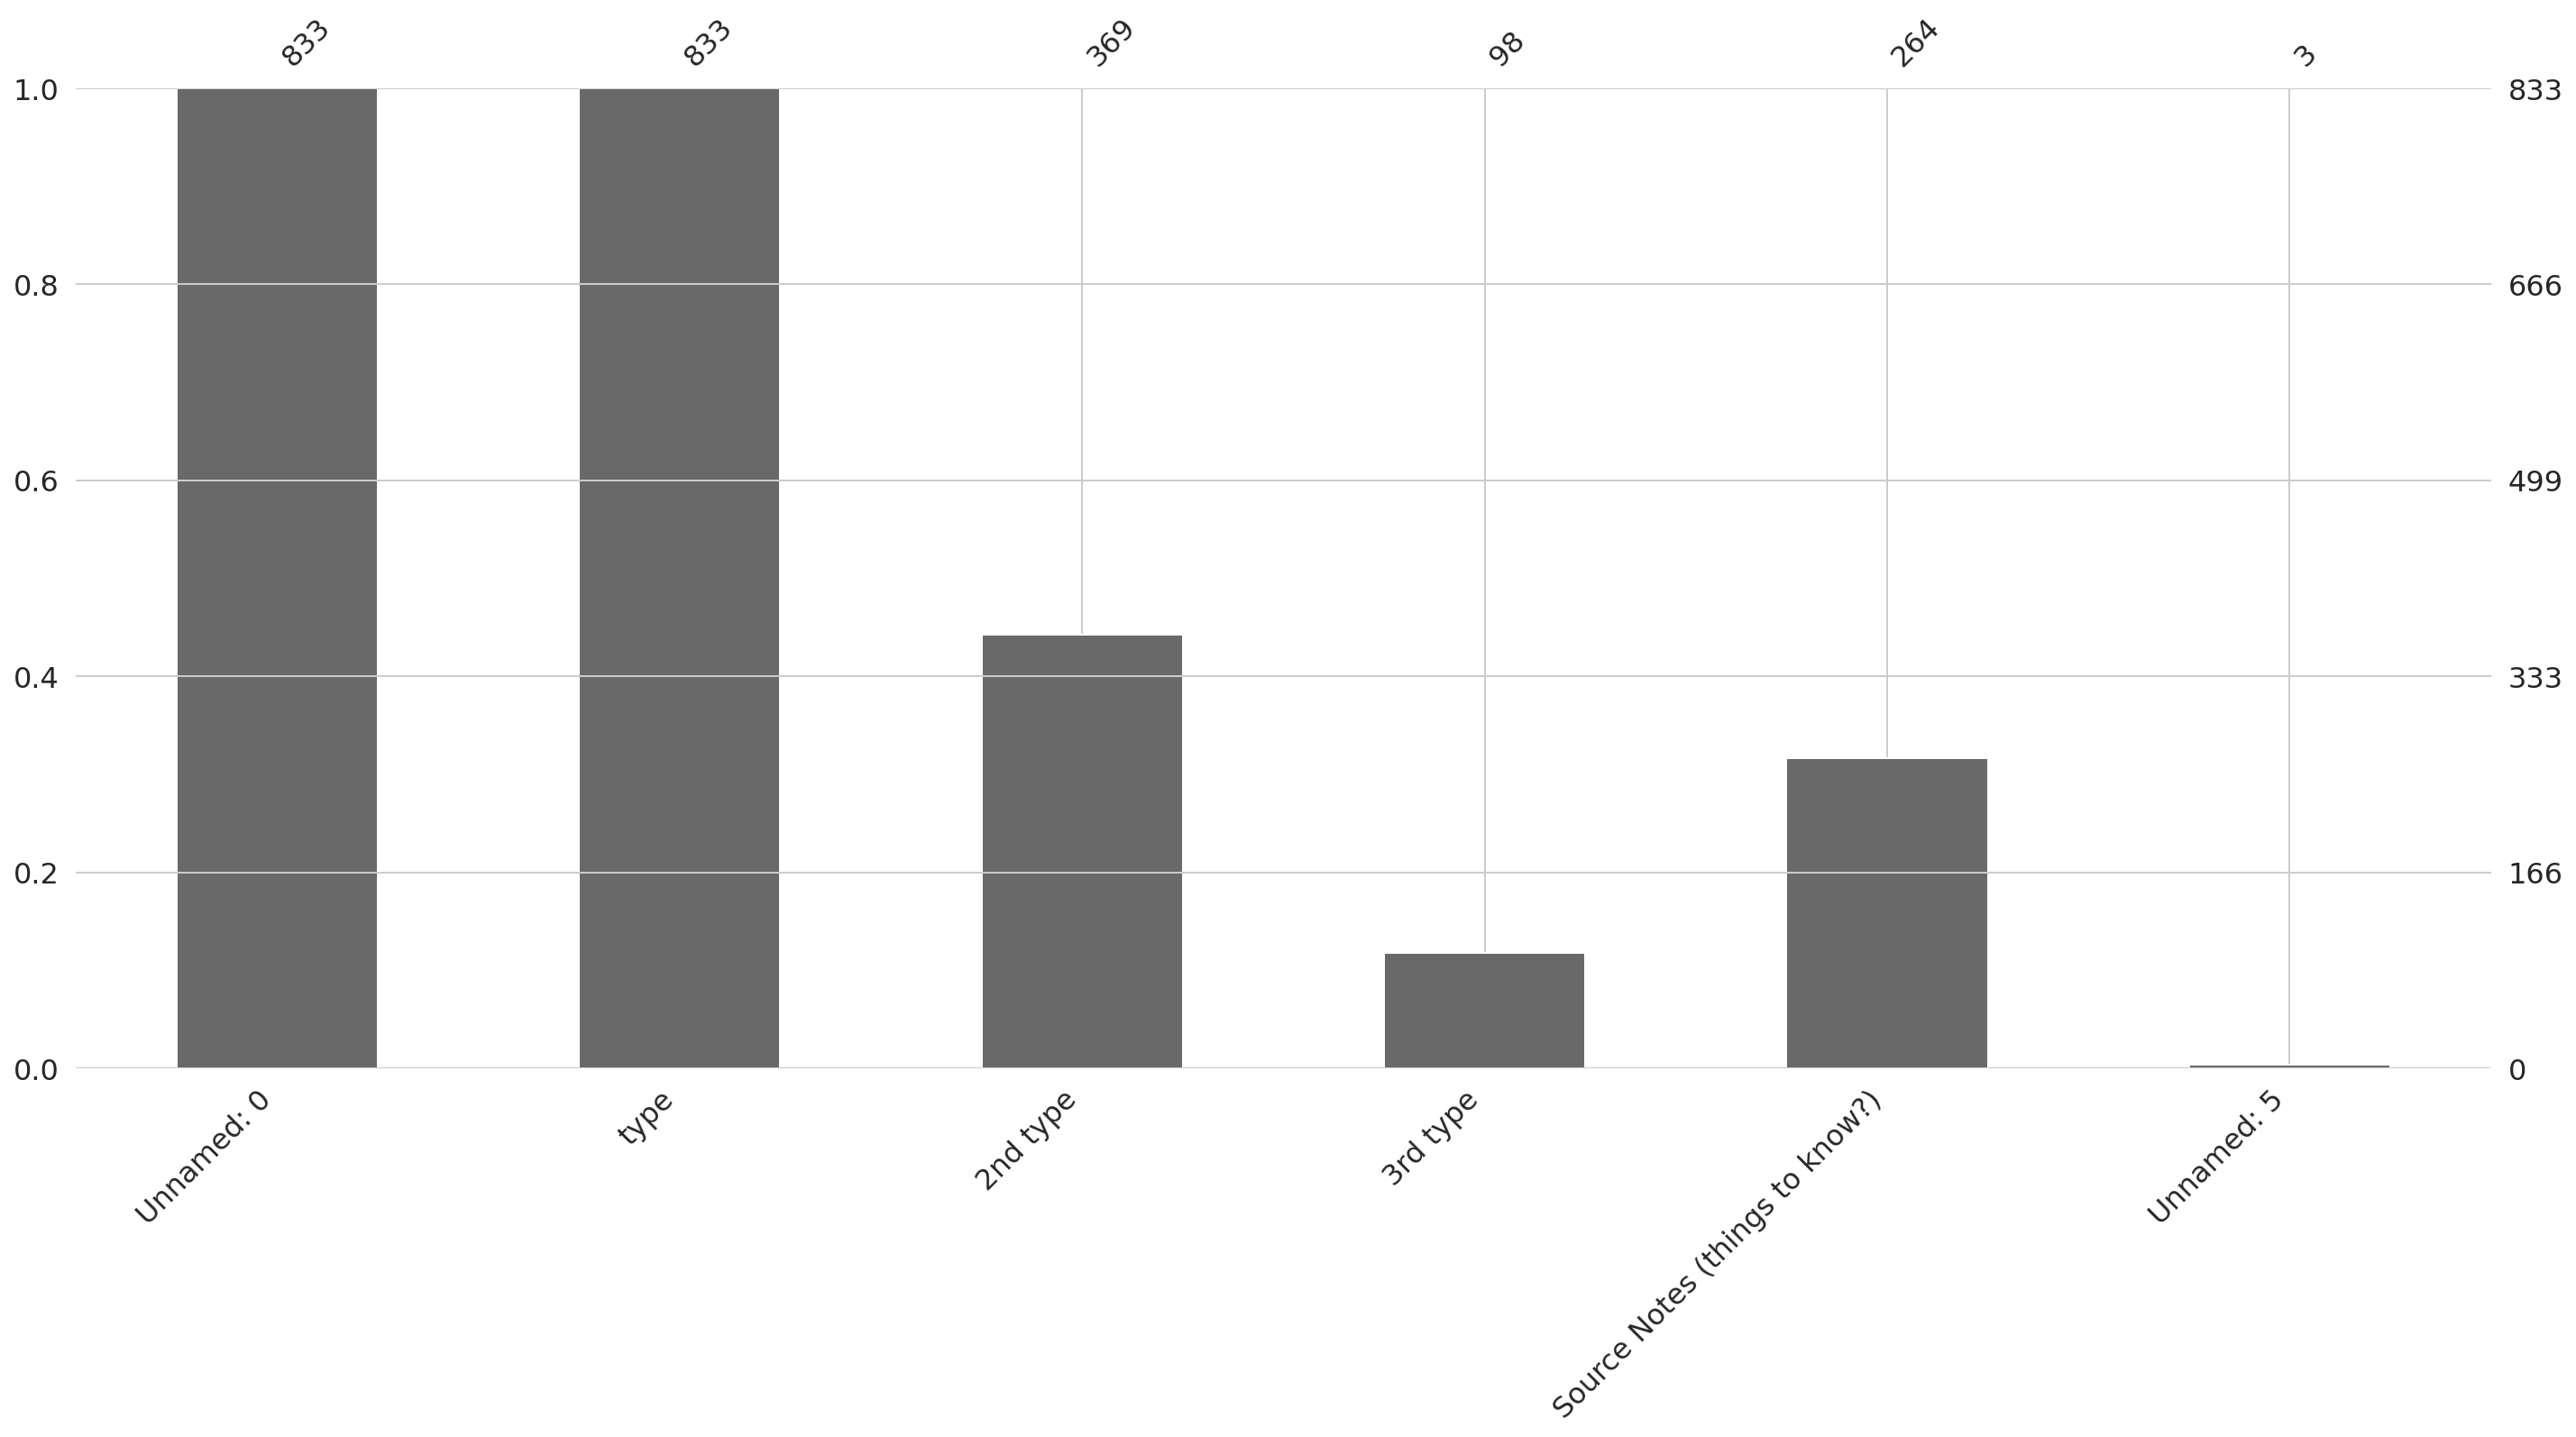

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

True

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'Unnamed: 0', '2nd type', '3rd type', 'Unnamed: 5'
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
    'Source Notes (things to know?)'
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'type' # attribute considered as "label"

### Label attribute distribution

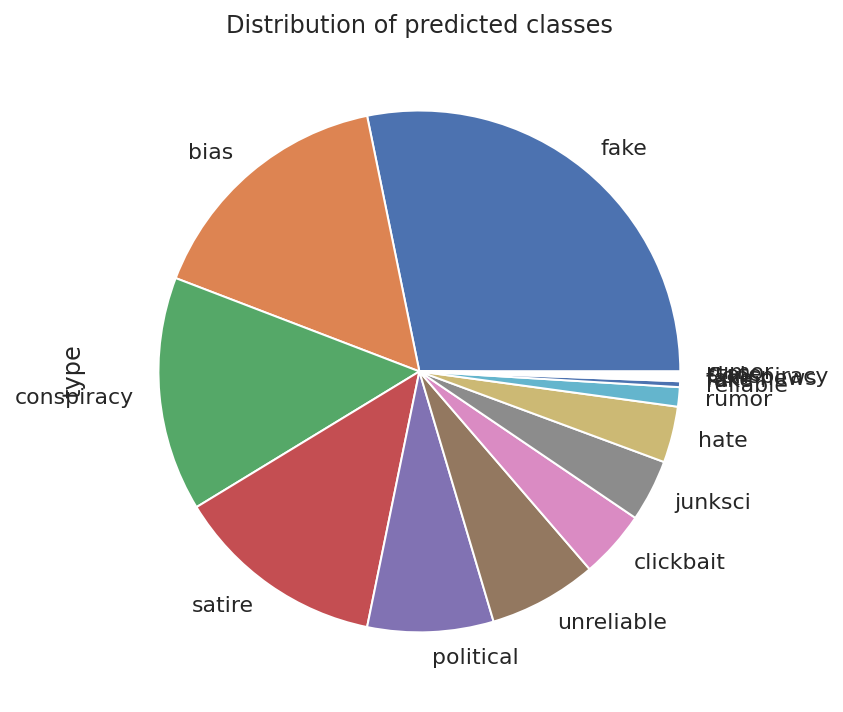

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

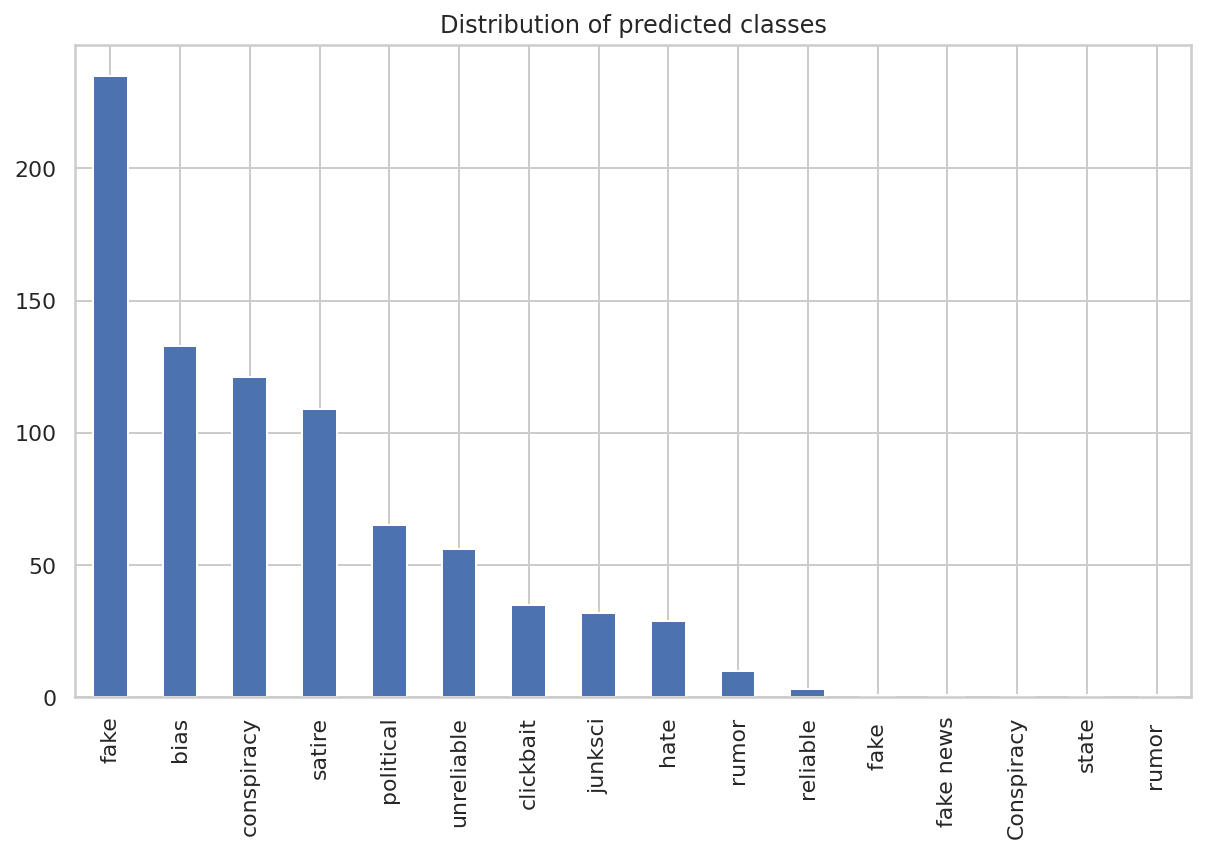

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

There are no attributes to be analysed.


### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:



Analysis of attribute "Source Notes (things to know?)"


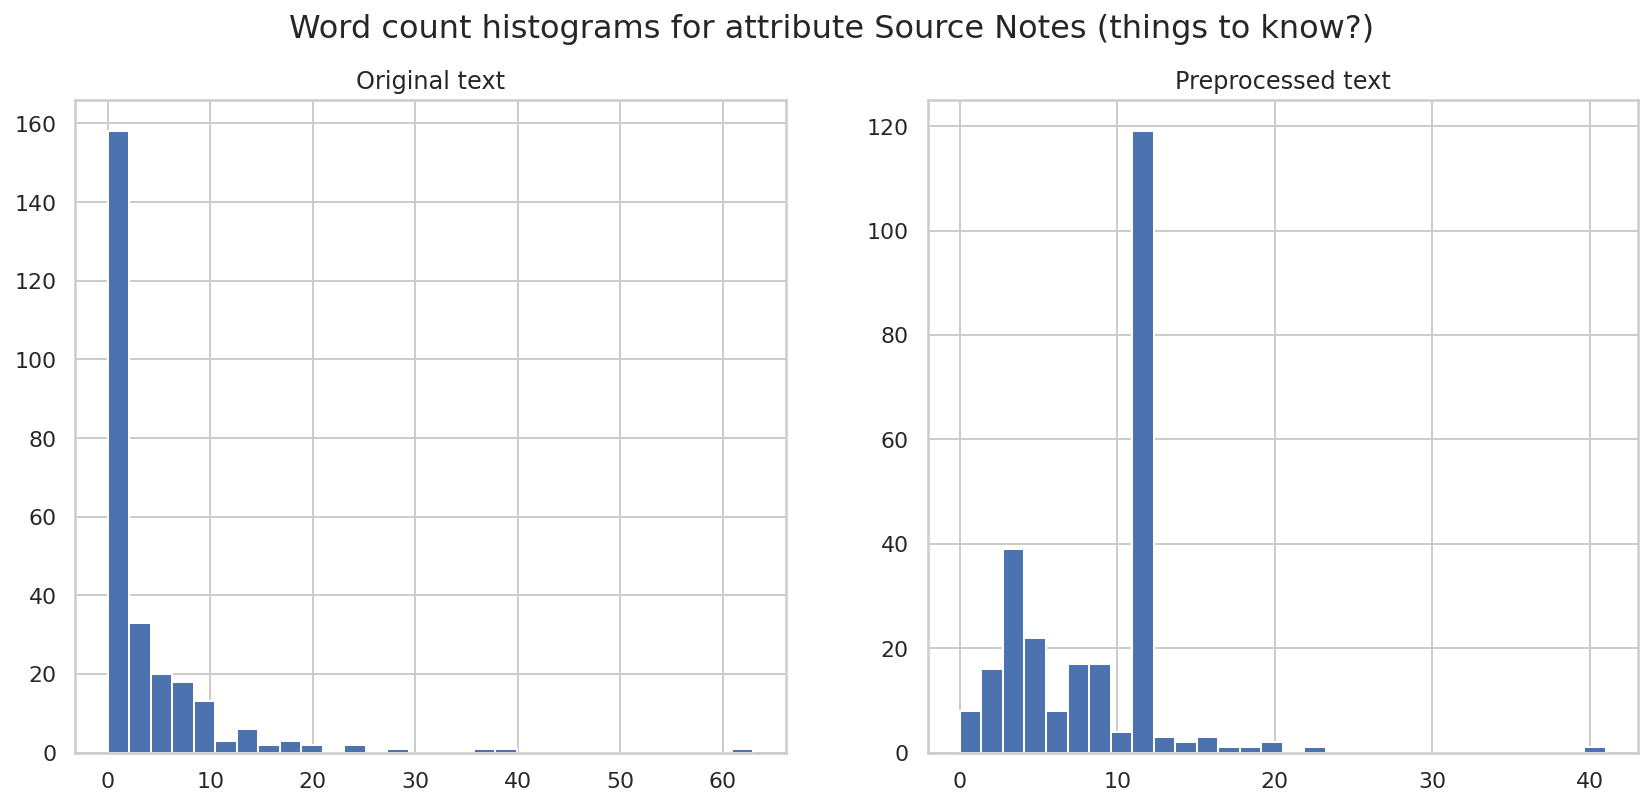

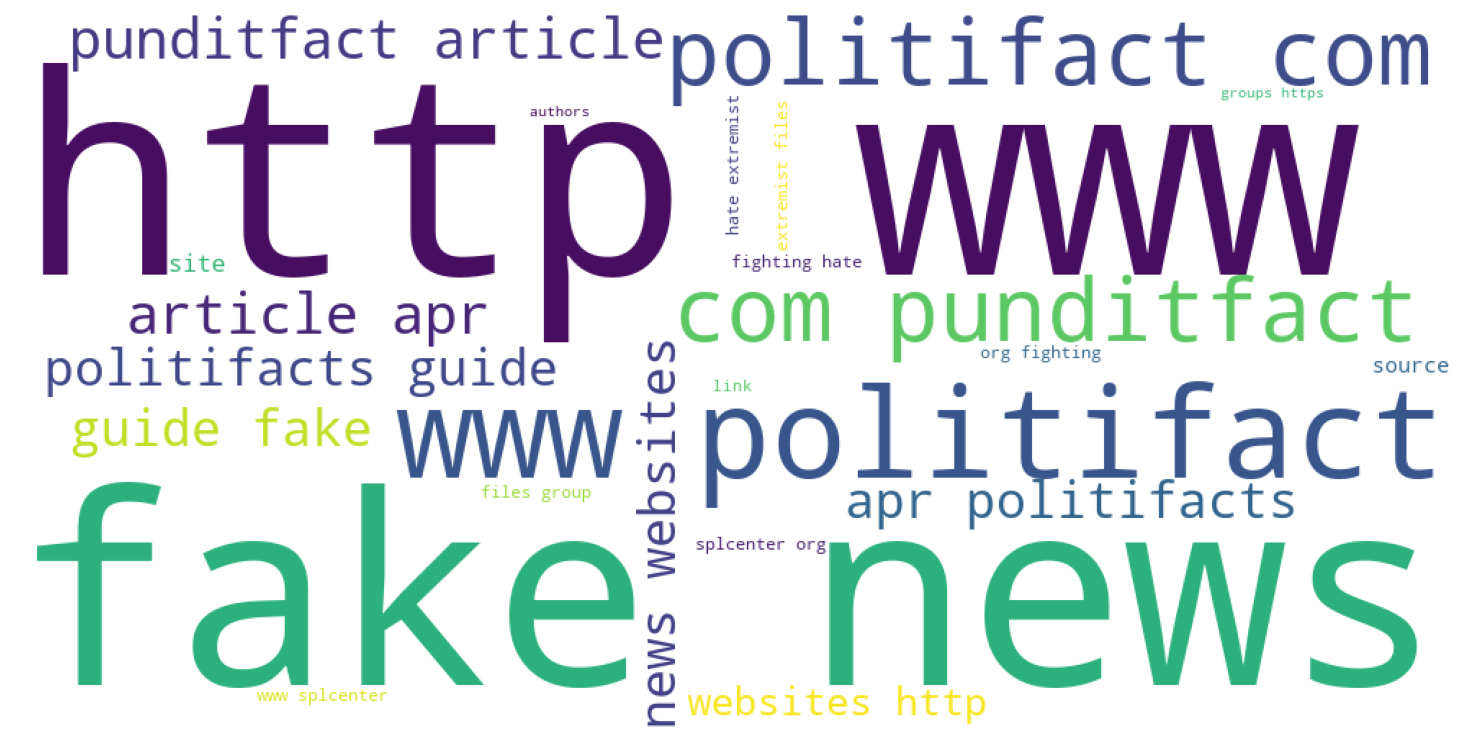

In [18]:
analyse_textual_attributes(df, textual_attributes)

## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)